In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/msk_2024_mutations_clean.csv')
df

,Gene,Sample,Patient,mutationType,variantType,chr,startPosition,endPosition,proteinPosStart,proteinPosEnd,tumorAlleleFreq,normalAlleleFreq
0,PIK3CA,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,3,178936091,178936091,545,545,0.411765,0.000000
1,TP53,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,17,7577539,7577539,248,248,0.317708,0.000000
2,GATA3,P-0000015-T01-IM3,P-0000015,Frame_Shift_Ins,INS,10,8111513,8111514,333,335,0.165563,0.000000
3,ESR1,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,6,152419920,152419920,536,536,0.365854,0.000000
4,ALK,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,2,29450535,29450535,940,940,0.193416,0.001134
...,...,...,...,...,...,...,...,...,...,...,...,...
205544,YAP1,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,102056760,102056760,234,234,0.262338,0.000000
205545,ATM,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,108188190,108188190,2097,2097,0.187835,0.000000
205546,KMT2C,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,7,151874919,151874919,2540,2540,0.313312,0.000000
205547,KMT2C,P-0009406-T01-IM3,P-0009406,Frame_Shift_Del,DEL,7,151874913,151874913,2542,2542,0.316393,0.000000


In [29]:
# Add Gene Nodes
gene_counts = df['Gene'].value_counts(normalize=True)
genes_to_keep = gene_counts[gene_counts >= 0.001].index
df = df[df['Gene'].isin(genes_to_keep)]
print(f'Genes kept: {len(genes_to_keep)} out of {len(df["Gene"].unique())}')

genes = df["Gene"].unique()
# mutation subtypes
df["Mutation_Subtype"] = df["Gene"] + "_" + df["mutationType"] + "_" + df["variantType"] + "_chr" + df["chr"].astype(str)
mutation_subtypes = df["Mutation_Subtype"].unique()

print("Number of unique genes:", len(genes))
print("Number of unique mutation subtypes:", len(mutation_subtypes))
df

Genes kept: 262 out of 262
Number of unique genes: 262
Number of unique mutation subtypes: 2792


/tmp/ipykernel_21746/2039671666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mutation_Subtype"] = df["Gene"] + "_" + df["mutationType"] + "_" + df["variantType"] + "_chr" + df["chr"].astype(str)


,Gene,Sample,Patient,mutationType,variantType,chr,startPosition,endPosition,proteinPosStart,proteinPosEnd,tumorAlleleFreq,normalAlleleFreq,Mutation_Subtype
0,PIK3CA,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,3,178936091,178936091,545,545,0.411765,0.000000,PIK3CA_Missense_Mutation_SNP_chr3
1,TP53,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,17,7577539,7577539,248,248,0.317708,0.000000,TP53_Missense_Mutation_SNP_chr17
2,GATA3,P-0000015-T01-IM3,P-0000015,Frame_Shift_Ins,INS,10,8111513,8111514,333,335,0.165563,0.000000,GATA3_Frame_Shift_Ins_INS_chr10
3,ESR1,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,6,152419920,152419920,536,536,0.365854,0.000000,ESR1_Missense_Mutation_SNP_chr6
4,ALK,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,2,29450535,29450535,940,940,0.193416,0.001134,ALK_Missense_Mutation_SNP_chr2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205543,TET1,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,10,70405802,70405802,1106,1106,0.193237,0.000000,TET1_Missense_Mutation_SNP_chr10
205545,ATM,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,108188190,108188190,2097,2097,0.187835,0.000000,ATM_Missense_Mutation_SNP_chr11
205546,KMT2C,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,7,151874919,151874919,2540,2540,0.313312,0.000000,KMT2C_Missense_Mutation_SNP_chr7
205547,KMT2C,P-0009406-T01-IM3,P-0009406,Frame_Shift_Del,DEL,7,151874913,151874913,2542,2542,0.316393,0.000000,KMT2C_Frame_Shift_Del_DEL_chr7


In [30]:
import networkx as nx

G = nx.Graph()

for _, row in df.iterrows():
    mutation_node = row["Mutation_Subtype"]
    G.add_node(mutation_node)

# show the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")

Number of nodes: 2792


In [31]:
from itertools import combinations
from collections import Counter

# Group mutations by patient
patient_mutations = df.groupby("Patient")["Mutation_Subtype"].apply(list)

patient_mutations

duplicate_mutations = 0
single_mutations = 0

# for each patient, check if they have mutations in the same gene subtype
mutation_pairs = []
single_mutations_list = {}
for patient, mutations in patient_mutations.items():
    if len(mutations) > 1:
        list_len = len(mutations)
        set_len = len(set(mutations))
        if list_len != set_len:  # Check for duplicates
            duplicate_mutations += 1
    else:
        single_mutations += 1
        if mutations[0] not in single_mutations_list:
            single_mutations_list[mutations[0]] = 1
        else:
            single_mutations_list[mutations[0]] += 1

# Count occurrences of each mutation pair
print(f"Total patients with duplicate mutations: {duplicate_mutations}")
print(f"Total patients with single mutations: {single_mutations}")

Total patients with duplicate mutations: 3909
Total patients with single mutations: 2340


In [32]:
mutation_cooccurrence = Counter()

# preprocess patient mutations to count co-occurrences
# remove all duplicates from the mutation list for each patient, we are ignoring the details like start/end positions
# and only focusing on the unique mutation subtypes for co-occurrence analysis
patient_mutations = [list(set(mutations)) for mutations in patient_mutations]

# Iterate through each patient's mutations and count co-occurrences
for mutations in patient_mutations:
    for m1, m2 in combinations(mutations, 2):
        mutation_cooccurrence[(m1, m2)] += 1
        
print(f"Total unique mutation pairs: {len(mutation_cooccurrence)}")
print(mutation_cooccurrence.most_common(10))  # Show top 10 co-occurring mutation pairs

Total unique mutation pairs: 516358
[(('TP53_Missense_Mutation_SNP_chr17', 'KRAS_Missense_Mutation_SNP_chr12'), 1632), (('TP53_Missense_Mutation_SNP_chr17', 'APC_Nonsense_Mutation_SNP_chr5'), 1359), (('KRAS_Missense_Mutation_SNP_chr12', 'TP53_Missense_Mutation_SNP_chr17'), 1110), (('APC_Nonsense_Mutation_SNP_chr5', 'KRAS_Missense_Mutation_SNP_chr12'), 1051), (('PIK3CA_Missense_Mutation_SNP_chr3', 'TP53_Missense_Mutation_SNP_chr17'), 893), (('APC_Frame_Shift_Del_DEL_chr5', 'TP53_Missense_Mutation_SNP_chr17'), 730), (('APC_Frame_Shift_Del_DEL_chr5', 'KRAS_Missense_Mutation_SNP_chr12'), 691), (('PIK3CA_Missense_Mutation_SNP_chr3', 'KRAS_Missense_Mutation_SNP_chr12'), 641), (('APC_Frame_Shift_Del_DEL_chr5', 'APC_Nonsense_Mutation_SNP_chr5'), 556), (('PTPRT_Missense_Mutation_SNP_chr20', 'TP53_Missense_Mutation_SNP_chr17'), 439)]


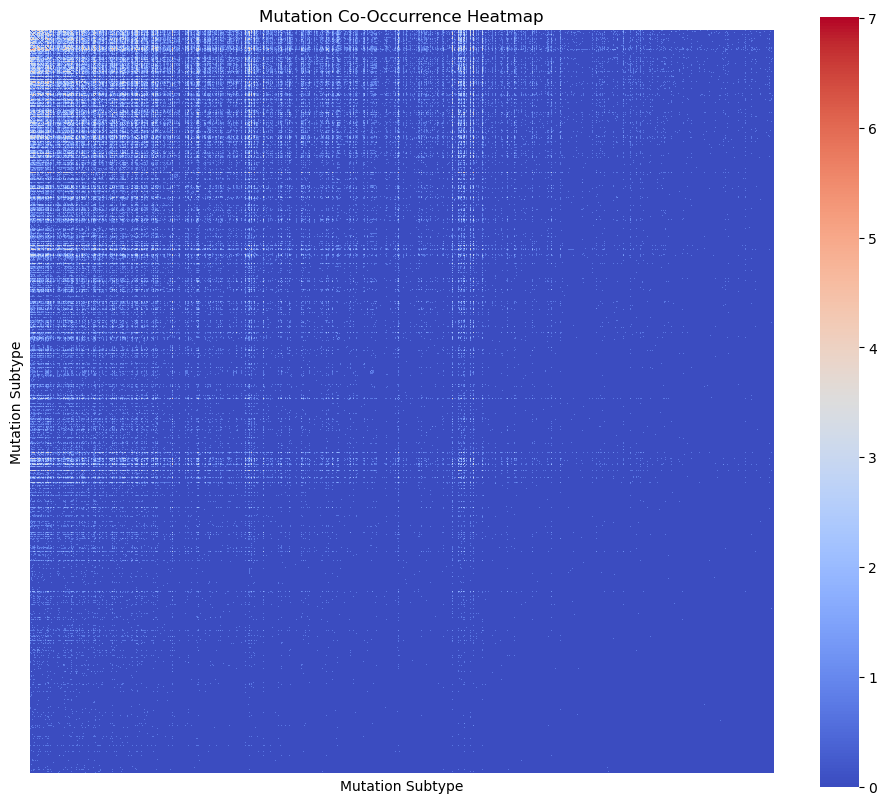

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert co-occurrence counts into a matrix
mutation_list = list(mutation_subtypes)
cooccurrence_matrix = pd.DataFrame(np.zeros((len(mutation_list), len(mutation_list))), index=mutation_list, columns=mutation_list)
for (m1, m2), count in mutation_cooccurrence.items():
    cooccurrence_matrix.at[m1, m2] = count
    cooccurrence_matrix.at[m2, m1] = count  # Ensure symmetry
    
# log-transform the co-occurrence matrix for better visualization
cooccurrence_matrix = np.log1p(cooccurrence_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence_matrix, cmap="coolwarm", square=True, xticklabels=False, yticklabels=False)
plt.title("Mutation Co-Occurrence Heatmap")
plt.xlabel("Mutation Subtype")
plt.ylabel("Mutation Subtype")
plt.show()

In [34]:
co_occurrence_values = np.array(list(mutation_cooccurrence.values()))
# min_weight = co_occurrence_values.min()
# max_weight = co_occurrence_values.max()

# Avoid division by zero if all weights are the same
# if max_weight == min_weight:
#     max_weight += 1
    
# Normalize weights using log1p
normalized_weights = {pair: np.log1p(weight) for pair, weight in mutation_cooccurrence.items()}

for (m1, m2), norm_weight in normalized_weights.items():
    if m1 != m2: # Avoid self-loops
        G.add_edge(m1, m2, weight=norm_weight)

print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")

Total Nodes: 2792
Total Edges: 424352


In [35]:
# Encode gene names as one-hot vectors
unique_genes = df["Gene"].unique()
gene_to_index = {gene: idx for idx, gene in enumerate(unique_genes)}

# Create feature matrix
node_features = {}
for mutation in mutation_subtypes:
    gene_name = mutation.split("_")[0]  # Extract gene from mutation subtype
    gene_one_hot = np.zeros(len(unique_genes))
    gene_one_hot[gene_to_index[gene_name]] = 1  # One-hot encode gene

    if mutation in single_mutations_list:
        single_mutation_count = single_mutations_list[mutation]
    else:
        single_mutation_count = 0

    # Store feature vector
    node_features[mutation] = np.concatenate([[single_mutation_count], gene_one_hot])
    
# select a node to visualize its features
mutation_to_visualize = mutation_subtypes[0]  # Change this to visualize different mutations
print(f"Node features for {mutation_to_visualize}:")
print(node_features[mutation_to_visualize])
# Convert node features to DataFrame for easier visualization
node_features_df = pd.DataFrame.from_dict(node_features, orient='index')
node_features_df.columns = ['Single Mutation Count'] + [f'Gene_{gene}' for gene in unique_genes]
node_features_df.index.name = 'Mutation Subtype'
node_features_df.reset_index(inplace=True)
node_features_df


Node features for PIK3CA_Missense_Mutation_SNP_chr3:
[141.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0

,Mutation Subtype,Single Mutation Count,Gene_PIK3CA,Gene_TP53,Gene_GATA3,Gene_ESR1,Gene_ALK,Gene_RNF43,Gene_TSHR,Gene_IRS1,...,Gene_CYLD,Gene_TP53BP1,Gene_ERF,Gene_TAP2,Gene_AGO2,Gene_ELF3,Gene_SOS1,Gene_CSDE1,Gene_PRDM14,Gene_HLA-B
0,PIK3CA_Missense_Mutation_SNP_chr3,141.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TP53_Missense_Mutation_SNP_chr17,315.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GATA3_Frame_Shift_Ins_INS_chr10,54.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESR1_Missense_Mutation_SNP_chr6,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALK_Missense_Mutation_SNP_chr2,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,PIK3CG_Translation_Start_Site_SNP_chr7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2788,NCOR1_Nonsense_Mutation_INS_chr17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2789,ARID1A_frameshift_insertion_DNP_chr1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2790,ATRX_Splice_Site_INS_chr23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Detect all self-loops
self_loops = list(nx.selfloop_edges(G))
print(f"Self-loops found: {self_loops}")
print(f"Total self-loops: {len(self_loops)}")

Self-loops found: []
Total self-loops: 0


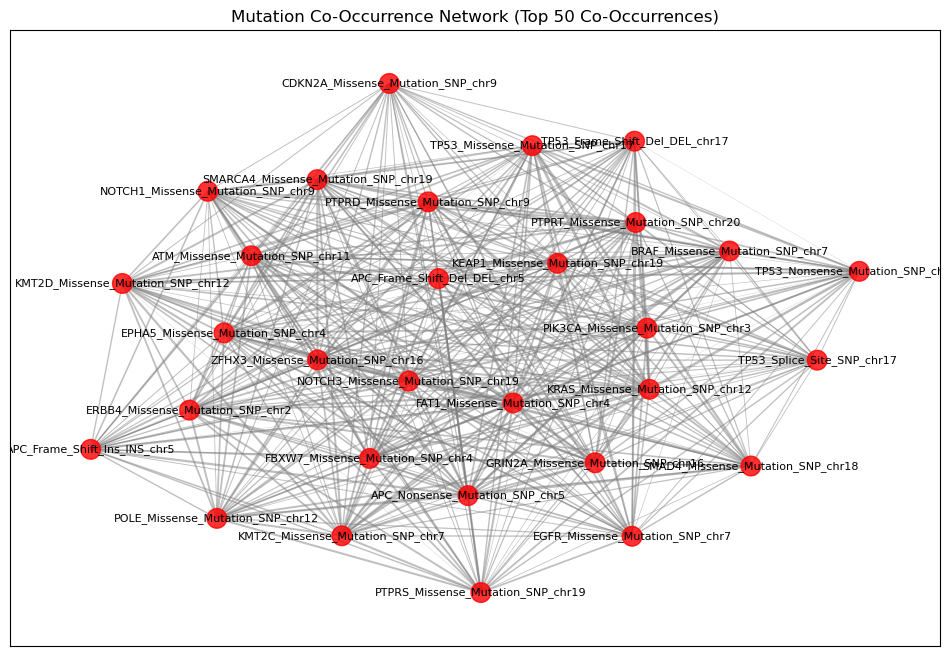

In [37]:
### **Step 4: Visualize a Subgraph of Highly Connected Mutations**
# Get the top 50 most frequently co-occurring mutation pairs
import matplotlib.pyplot as plt
top_mutation_pairs = sorted(mutation_cooccurrence, key=mutation_cooccurrence.get, reverse=True)[:50]

# Extract subgraph containing these mutations
subgraph_nodes = set()
for m1, m2 in top_mutation_pairs:
    subgraph_nodes.add(m1)
    subgraph_nodes.add(m2)

subgraph = G.subgraph(subgraph_nodes)

# Define node colors (all mutations are red)
node_colors = ["red" for _ in subgraph.nodes()]

# Get edge weights (co-occurrence frequency)
edges = nx.get_edge_attributes(subgraph, "weight")

# Apply force-directed layout
pos = nx.spring_layout(subgraph, seed=42, k=0.3)  # k controls node spacing

plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color=node_colors, alpha=0.8)

# Draw edges with thickness based on weight
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, width=[w * 0.3 for w in edges.values()], edge_color="gray")

# Draw labels for top mutations
labels = {node: node for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8, font_color="black")

# Show plot
plt.title("Mutation Co-Occurrence Network (Top 50 Co-Occurrences)")
plt.show()

In [39]:
# Step 1: Filter Top 50% of Co-Occurrence Edges**
edges = list(G.edges(data=True))
edge_weights = np.array([edge[2]["weight"] for edge in edges])

# Compute the median weight (30th percentile) to use as a threshold
threshold = np.percentile(edge_weights, 70)  # Adjust this value to set your desired
print(f"Threshold for filtering: {threshold}")

# Keep only edges above the median weight
filtered_edges = [(u, v, d) for u, v, d in edges if d["weight"] >= threshold]
G_filtered = nx.Graph()
G_filtered.add_edges_from(filtered_edges)
print(f"Filtered graph has {G_filtered.number_of_nodes()} nodes and {G_filtered.number_of_edges()} edges.")


Threshold for filtering: 1.0986122886681096
Filtered graph has 1819 nodes and 187793 edges.


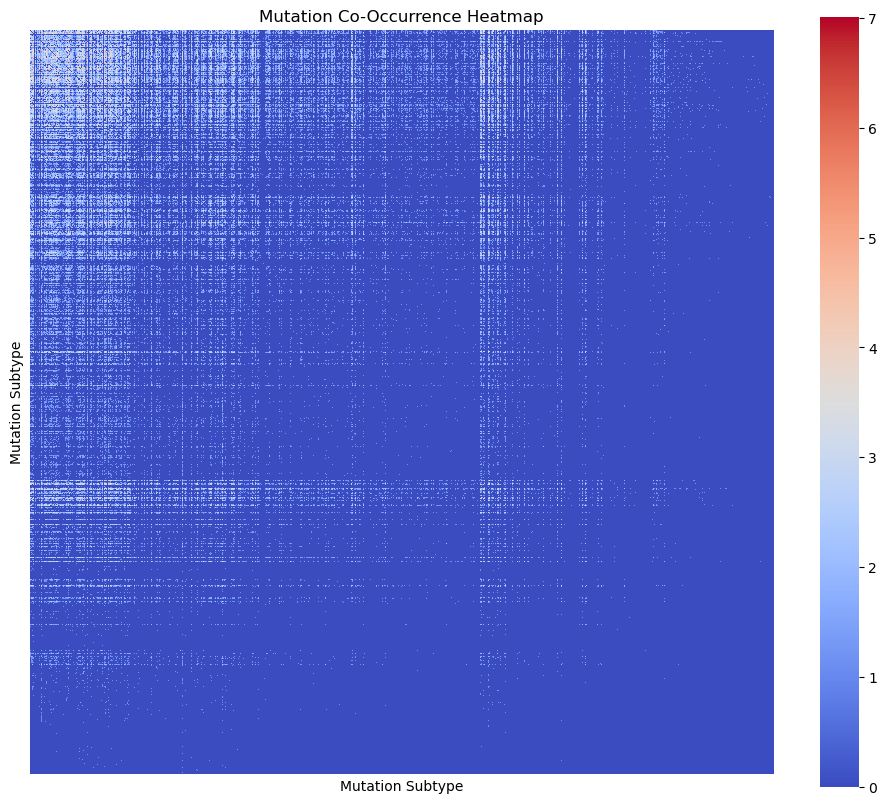

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert co-occurrence counts into a matrix
mutation_list = list(G_filtered.nodes())
cooccurrence_matrix = pd.DataFrame(np.zeros((len(mutation_list), len(mutation_list))), index=mutation_list, columns=mutation_list)

# Fill the matrix with edge weights
for m1, m2, count in G_filtered.edges(data='weight'):
    cooccurrence_matrix.at[m1, m2] = count
    cooccurrence_matrix.at[m2, m1] = count  # Ensure symmetry
    
# log-transform the co-occurrence matrix for better visualization
# cooccurrence_matrix = np.log1p(cooccurrence_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence_matrix, cmap="coolwarm", square=True, xticklabels=False, yticklabels=False)
plt.title("Mutation Co-Occurrence Heatmap")
plt.xlabel("Mutation Subtype")
plt.ylabel("Mutation Subtype")
plt.show()

In [43]:
import torch
from torch_geometric.utils import from_networkx, to_undirected

# Convert the NetworkX graph to a PyTorch Geometric Data object
# we have 263 node features (gene + single mutation count)
G = G_filtered
feature_matrix = np.array([node_features[node] for node in G.nodes()])
feature_tensor = torch.tensor(feature_matrix, dtype=torch.float)
print(f"Feature tensor shape: {feature_tensor.shape}")

# Convert node features (currently empty) to embeddings
data = from_networkx(G, group_edge_attrs=["weight"])
data.edge_index = to_undirected(data.edge_index)
data.x = feature_tensor  # Assign node features

# Convert edge weights to a PyTorch tensor
data.edge_weight = torch.tensor([d['weight'] for _, _, d in G.edges(data=True)], dtype=torch.float)
del data.weight  # Remove original attribute

# save the graph data to a file
torch.save(data, "../data/msk_2024_graph_data.pt")

print(f"Graph Data: {data}")

Feature tensor shape: torch.Size([1819, 263])
Graph Data: Data(edge_index=[2, 375586], edge_attr=[375586, 1], num_nodes=1819, x=[1819, 263], edge_weight=[187793])
